In [1]:
# from experiment.photometry import photometry
# from tools.utils import create_experiment_dir
# new_experiment_dir = create_experiment_dir('/Users/mingyu/Desktop/OPMD_Mingyu/results/experiment/photometry')
# photometry([556], 50, new_experiment_dir, repeat=100)

In [2]:
# from calibration.powermeter import powermeter_test
# from tools.utils import create_experiment_dir
# new_experiment_dir = create_experiment_dir('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/powermeter')
# powermeter_test(wl=556, trials=500, pause=60,  dir=new_experiment_dir, repeat=1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from analysis.tools import CHANNEL_5
from analysis.tools import load_hdul, load_data

from analysis.correlation import run_correlation

The rate of deviation from the PTC increases with the mean flux level, suggesting the measured PTC is has at least quadratic power. We perform fit of the PTC using linear, quadratic and higher order polynomials and compare the chi square of the fits. 

### Setup

In [6]:
import os 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
sns.set()
plt.rc('legend', fontsize=14)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
dt = '/Users/mingyu/Desktop/'

In [7]:
from analysis.correction import remove_baseline, smooth_spectrum
from calibration.plots import plot_central_wl_hist, plot_peak_spec_hist, plot_scatter, build
from calibration.plots import plot_measured_power_hist, plot_ambient_power_hist, plot_power_series
from analysis.correlation import run_correlation, correlation_map



### Figure 5

In [27]:
with open('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/powermeter/experiment_3/20200325-051847_wl-556.pkl', 'rb') as handle: 
    content = pickle.load(handle)
dictionary, df = build(measured_power_trials=content['measured_power_trials'],
                       ambient_power_trials=content['ambient_power_trials'],
                       second_trials=content['second_trials'],
                       wl=content['wl'],
                       actualwl=content['actualwl'],
                       trials=content['trials'],
                       pause=content['pause'])

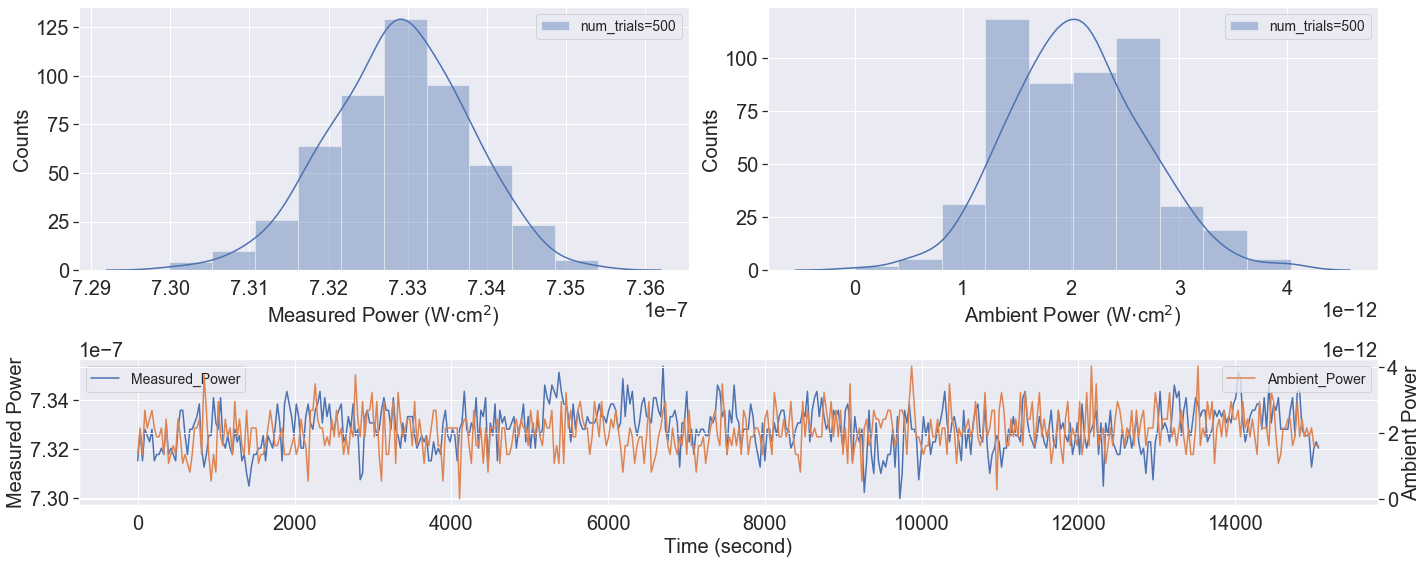

In [28]:
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(5, 2)
plot_measured_power_hist(plt.subplot(gs[0:3, 0]), df, 500)
plot_ambient_power_hist(plt.subplot(gs[0:3, 1]), df, 500)
plot_power_series(plt.subplot(gs[3:, :]), df)
plt.tight_layout()
fig.savefig(os.path.join(dt, 'intensity.pdf'), format='pdf')

### Figure 6

In [29]:
plt.rc('axes', labelsize=20)
with open('/Users/mingyu/Desktop/OPMD_Mingyu/results/experiment/photometry/experiment_1/20200204-171915.pkl', 'rb') as handle: 
    content = pickle.load(handle)

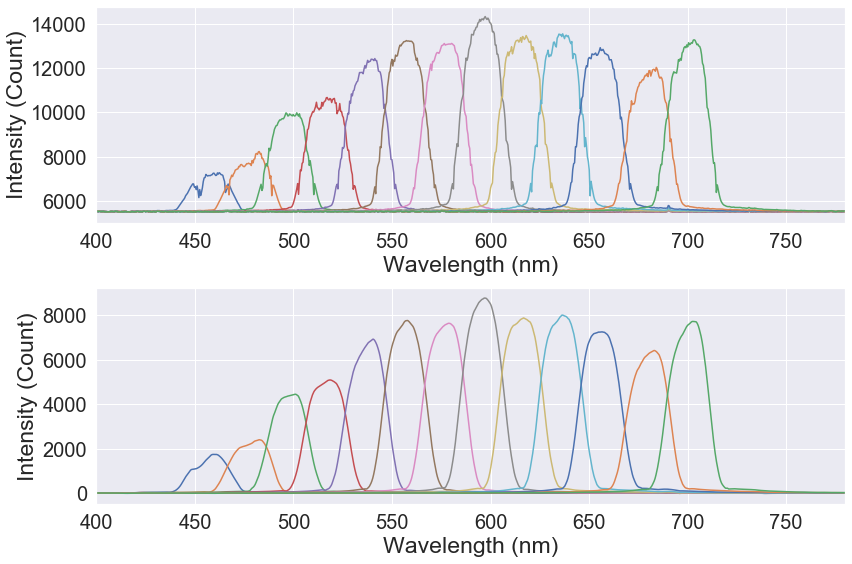

In [35]:
plt.rc('axes', labelsize=23)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
for i in range(np.shape(content['specwls'])[0]): 
    specwl, spec = smooth_spectrum(content['specwls'][i], remove_baseline(content['specs'][i], implementation=0), out=True)
    axes[0].plot(content['specwls'][i], content['specs'][i])
    axes[1].plot(specwl, spec)
axes[0].set_xlim(400, 780)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_ylabel('Intensity (Count)')
axes[1].set_xlim(400, 780)
axes[1].set_xlabel('Wavelength (nm)')
axes[1].set_ylabel('Intensity (Count)')
axes[1].ticklabel_format(axis='both', style='scientific')
plt.tight_layout()
fig.savefig(os.path.join(dt, 'smooth.pdf'), format='pdf')

### Figure 7

In [32]:
from global_settings import LASER_REAL, LASER_SPEC 
from analysis.correction import convolution

wl, I = LASER_REAL['wl'], LASER_REAL['I']
specwl, spec = LASER_SPEC['specwl'], LASER_SPEC['spec']
specwl_, spec_ = convolution(wl, I, specwl, 175) 

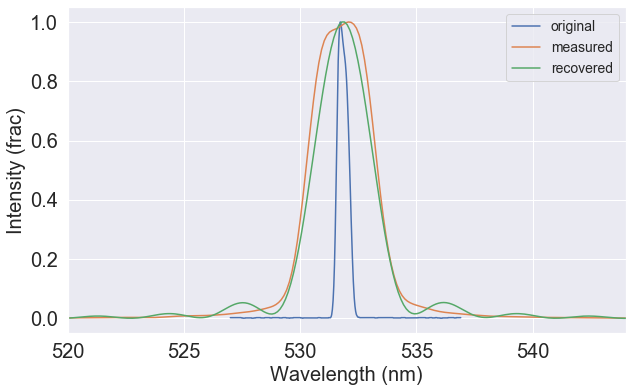

In [34]:
plt.rc('axes', labelsize=20)
fig = plt.figure(figsize=(10, 6))
plt.plot(wl, I/max(I), label='original')
plt.plot(specwl-0.18, spec**2/max(spec**2), label='measured')
plt.plot(specwl_, spec_/max(spec_), label='recovered')
plt.ylabel('Intensity (frac)')
plt.xlabel('Wavelength (nm)')
plt.xlim(520, 544)
plt.legend()
fig.savefig(os.path.join(dt, 'laser.pdf'), format='pdf')

### Figure 8

In [36]:
from global_settings import LED_REAL, LED_SPEC 
from analysis.correction import deconvolution, load_measure, load_real

specwl, spec = load_measure(LED_SPEC)
wl = np.linspace(int(min(specwl)), int(max(specwl)), 100)
wl_, I_ = deconvolution(wl, specwl, spec, 175)

Measured spectrum shape: (100000,)


/Users/mingyu/Desktop/OPMD_Mingyu/src/analysis/correction.py:70: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wl_, I_ = np.array(wl), np.linalg.lstsq(M, spec)[0]


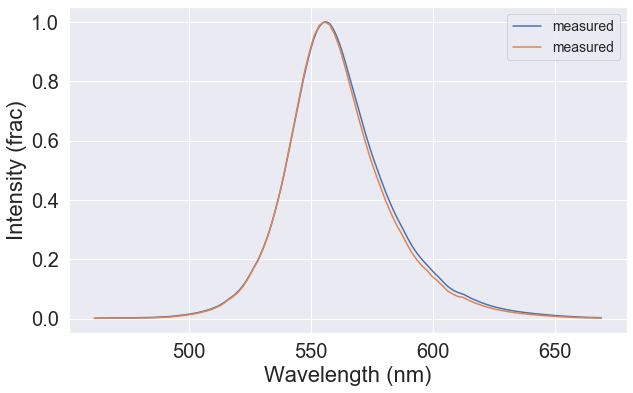

In [37]:
plt.rc('axes', labelsize=22)
fig = plt.figure(figsize=(10, 6))
plt.plot(specwl, spec/max(spec), label='measured')
plt.plot(wl_, I_/max(I_), label='measured')
plt.ylabel('Intensity (frac)')
plt.xlabel('Wavelength (nm)')
plt.legend()
fig.savefig(os.path.join(dt, 'led.pdf'), format='pdf')

### Figure 9

In [20]:
plt.rc('axes', labelsize=22)
with open('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/spectrometer/experiment_14/20200324-233237_wl-556.pkl', 'rb') as handle: 
    content = pickle.load(handle)
dictionary, df = build(central_wl_trials=content['central_wl_trials'],
                       peak_spec_trials=content['peak_spec_trials'],
                       intensity_trials=content['intensity_trials'],
                       second_trials=content['second_trials'],
                       wl=content['wl'],
                       actualwl=content['actualwl'],
                       trials=content['trials'],
                       pause=content['pause'])

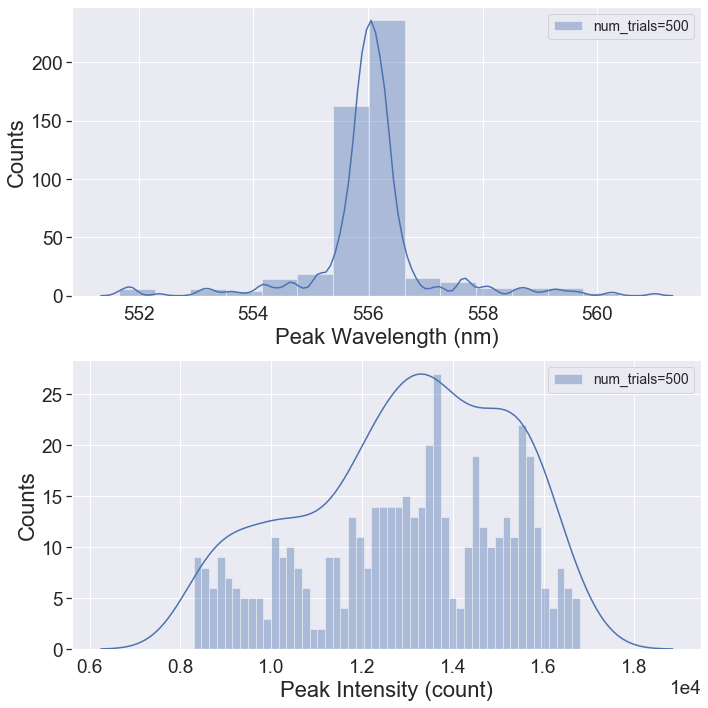

In [21]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 1)
plot_central_wl_hist(plt.subplot(gs[0, 0]), df, 500, 556)
plot_peak_spec_hist(plt.subplot(gs[1, 0]), df, 500, 30)
plt.tight_layout()
fig.savefig(os.path.join(dt, 'wavelength.pdf'), format='pdf')

### Figure 10

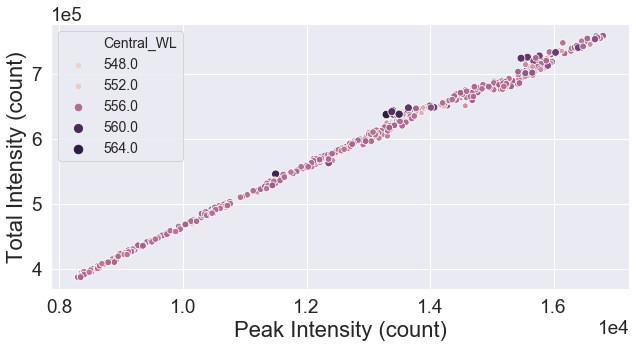

In [22]:
fig = plt.figure(figsize=(9, 5))
gs = gridspec.GridSpec(1, 1)
plot_scatter(plt.subplot(gs[0, 0]), df)
plt.tight_layout()
fig.savefig(os.path.join(dt, 'peak_intensity.pdf'), format='pdf')

### Figure 11

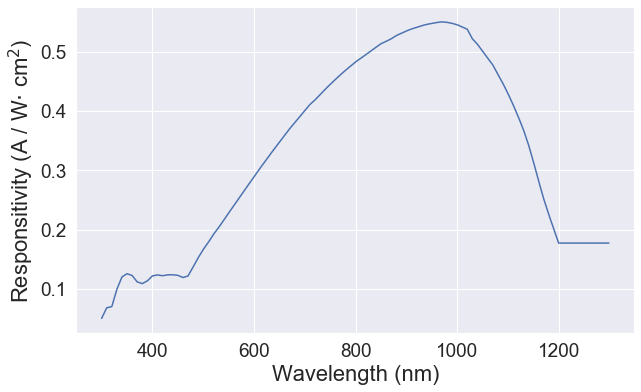

In [23]:
with open('/Users/mingyu/Desktop/OPMD_Mingyu/results/calibration/responsitivity/rs1.pkl', 'rb') as handle: 
    rs1 = pickle.load(handle)
fig = plt.figure(figsize=(10, 6))
plt.plot(np.arange(300, 1300), rs1)
plt.ylabel('Responsitivity (A / W$\cdot$ cm$^{2}$)')
plt.xlabel('Wavelength (nm)')
fig.savefig(os.path.join(dt, 'responsitivity.pdf'), format='pdf')

### Figure 12

In [8]:
from analysis.PTC import raw_PTC
plt.rc('legend', fontsize=14)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

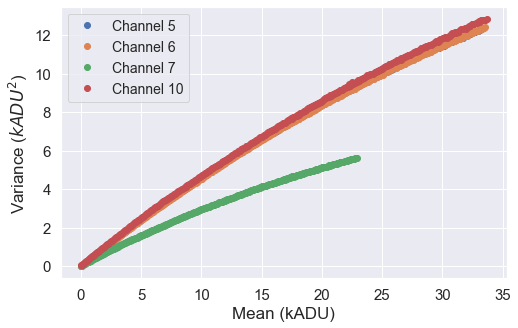

In [9]:
raw_PTC_im, ax = plt.subplots(1, 1, figsize=(8, 5))
raw_PTC('PTC20-29-04-00-22-54.fits', ax)
raw_PTC_im.savefig(os.path.join(dt, 'raw_PTC.pdf'), format='pdf', bbox_inches='tight')

### Figure 13

In [10]:
from analysis.PTC import PTC, PTC_fit
import matplotlib.gridspec as gridspec
plt.rc('legend', fontsize=14)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

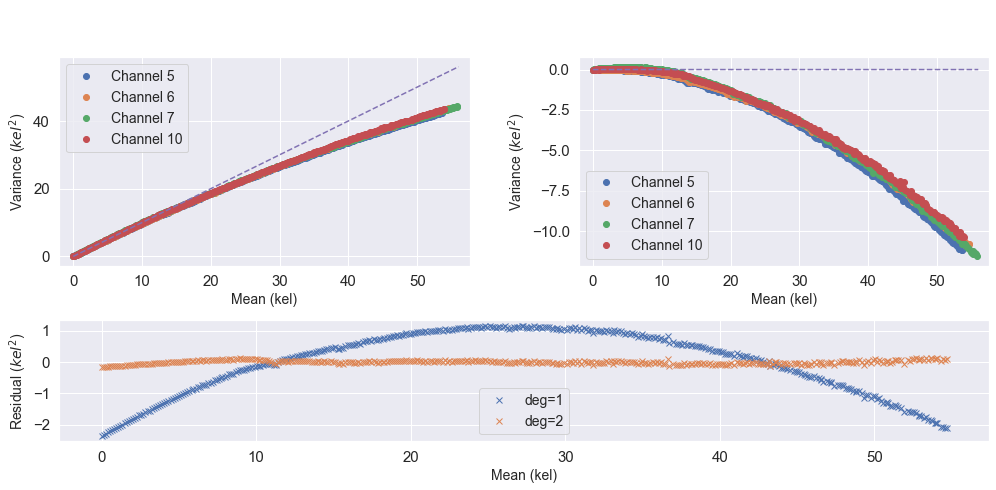

In [16]:
PTC_im = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(5, 2)
ax1 = plt.subplot(gs[0:3, 0])
ax2 = plt.subplot(gs[0:3, 1])
ax3 = plt.subplot(gs[3:, :])
PTC('PTC20-29-04-00-22-54.fits', ax1, ax2)
PTC_fit('PTC20-29-04-00-22-54.fits', deg=2, ax3=ax3)
plt.tight_layout()
PTC_im.savefig(os.path.join(dt, 'PTC.pdf'), format='pdf', bbox_inches='tight')

### Figure 14

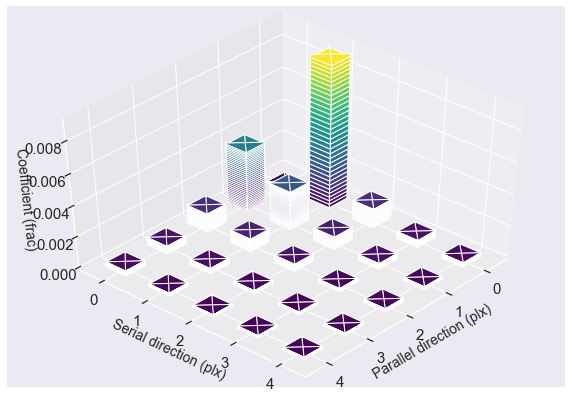

In [13]:
plt.rc('axes', labelsize=14)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection=Axes3D.name)
correlation_map('PTC20-29-04-00-26-21.fits', 5, limit=5, ax=ax)
fig.savefig(os.path.join(dt, 'correlation_map.pdf'), format='pdf', bbox_inches='tight')

### FIgure 16

(353,)
(361,)
(376,)
(367,)
(367,)
(371,)
(329,)
(355,)
(377,)
(381,)
(379,)
(377,)
(350,)
(388,)
(322,)
(385,)
(387,)
(370,)
(381,)
(331,)
(371,)
(369,)
(375,)
(382,)
(373,)
(390,)
(388,)
(361,)
(388,)
(356,)
(333,)
(359,)
(391,)
(341,)
(357,)
(383,)
(355,)
(382,)
(384,)
(382,)
(339,)
(332,)
(378,)
(385,)
(334,)
(381,)
(382,)
(387,)
(380,)
(384,)
(380,)
(388,)
(372,)
(369,)
(362,)
(384,)
(378,)
(377,)
(376,)
(383,)
(371,)
(345,)
(381,)
(367,)
(378,)
(372,)
(376,)
(368,)
(386,)
(371,)
(381,)
(348,)
(378,)
(385,)
(355,)
(308,)
(365,)
(384,)
(359,)
(366,)
(389,)
(383,)
(333,)
(365,)
(367,)
(386,)
(386,)
(383,)
(376,)
(366,)
(386,)
(362,)
(376,)
(389,)
(369,)
(386,)
(378,)
(378,)
(375,)
(337,)
(341,)
(358,)
(370,)
(377,)
(376,)
(378,)
(377,)
(377,)
(325,)
(366,)
(333,)
(362,)
(369,)
(346,)
(342,)
(322,)
(393,)
(361,)
(388,)
(384,)
(377,)
(390,)
(377,)
(389,)
(357,)
(376,)
(392,)
(384,)
(379,)
(376,)
(385,)
(333,)
(372,)
(384,)
(333,)
(368,)
(381,)
(381,)
(387,)
(392,)
(392,)
(373,)
(376,)

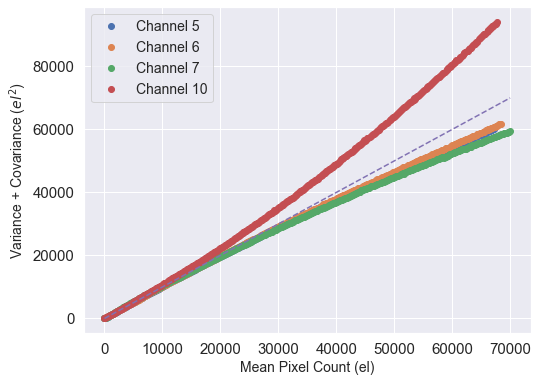

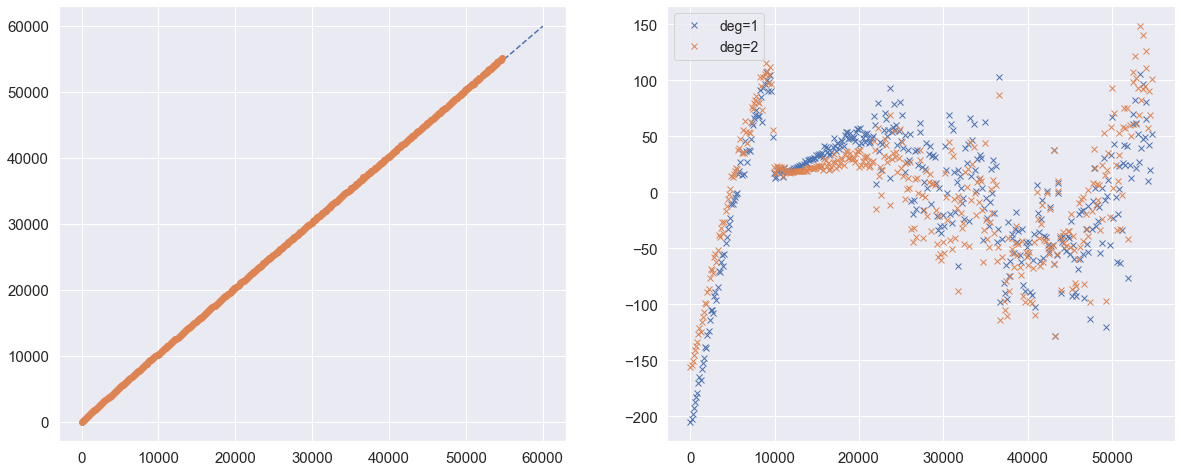

In [15]:
from analysis.covariance import run_covariance
run_covariance('PTC20-29-04-00-22-54.fits')

## Table

In [3]:
from analysis.tools import load_hdul, load_data
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
CHANNEL_5 = [5, 6, 7, 10]

In [4]:
def summary(file_name): 
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    hdul, vbb, wideint, wwideint = load_hdul(file_name)
    print(vbb, wideint, wwideint)
    alphas = 0
    corrs = 0
    for C in CHANNEL_5: 
        mean_el, diffvr_el, corr, alpha, gain = load_data(hdul, C, cutoff=0.75)
        alphas += alpha/4
        
        corr_10 = corr[:, 1, 0][20:] / 4
        x = np.linspace(0, 1, len(corr_10))
        reg = LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1), corr_10)
        corrs += reg.coef_/4
        axes[0].plot(mean_el, diffvr_el)
        axes[1].plot(x, corr_10)
    print('alphas:', alphas)
    print('corrs:', corrs[0])
    plt.show(fig)
    return fig

0.0 0 None
alphas: -4.1098682452566435e-06
corrs: 0.0022828936339121036


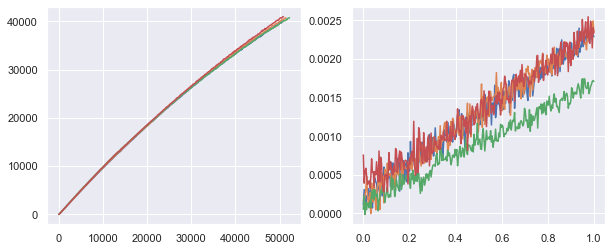

0.0 1 None
alphas: -3.8033181698421954e-06
corrs: 0.0018642135082554496


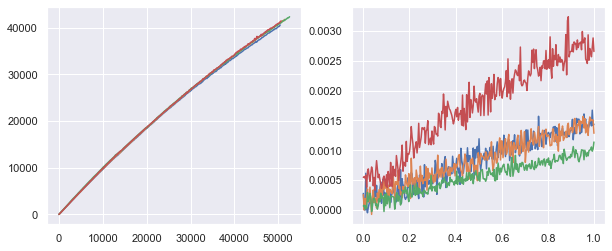

-60.0 0 None
alphas: -2.129234957566781e-06
corrs: 0.0021618198971085595


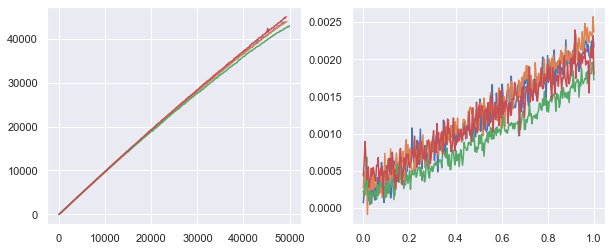

-60.0 1 None
alphas: -1.822629066902022e-06
corrs: 0.0016999963583161555


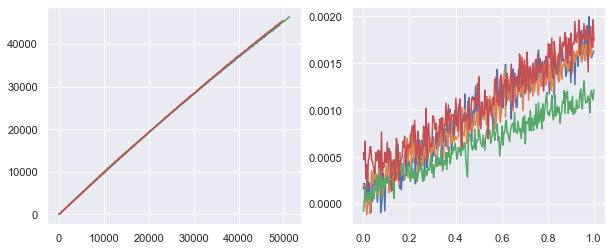

In [5]:
files = ['PTC20-28-04-16-15-29.fits', 'PTC20-29-04-00-22-54.fits', 
         'PTC20-29-04-00-33-09.fits', 'PTC20-29-04-00-26-21.fits']
for file in files: 
    fig = summary(file)